In [2]:
#SURF
!pip install numpy

In [1]:
!pip install --upgrade numpy



In [7]:
import mahotas
import mahotas.demos
import mahotas as mh
import numpy as np
import cv2 
from pylab import imshow, show
from mahotas.features import surf

In [8]:
img = cv2.imread('1 img.jpg')

In [9]:
scale_factor=2
new_width=int(img.shape[1]*scale_factor)
new_height=int(img.shape[0]*scale_factor)
resized_img=cv2.resize(img,(new_width,new_height))

In [10]:
f = mh.imread(resized_image, as_grey=True)
f = f.astype(np.uint8)
spoints = surf.surf(f)
print("Nr points:", len(spoints))

NameError: name 'resized_image' is not defined

In [6]:
from sklearn.cluster import KMeans
km = KMeans(
    n_clusters=5, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
values = km.fit_predict(spoints)
colors = np.array([(255-52*i,25+52*i,37**i % 101) for i in range(5)])

D:\python\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [7]:
img2 = surf.show_surf(f, spoints, values, colors)

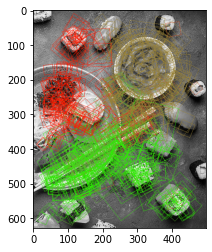

In [8]:
imshow(img2)

In [ ]:
#reference https://mahotas.readthedocs.io/en/latest/surf.html